In [1]:
# Imports and utilities from functions.ipynb

%run functions.ipynb

In [46]:
data_complete = pd.read_csv(rf'{export_data}data_experiment.csv', sep=";")
results_complete = pd.read_csv(rf'{export_data}results_experiment_valid.csv', sep=";")

numbers_display = pd.read_csv(rf'{export_data}numberDisplayed_all.csv', sep= ';')

ProbandId  Block          Condition  ConditionId
0           2      0        No Feedback            0
1           2      1  Combined Feedback            3
2           2      2    Visual Feedback            2
3           2      3   Tactile Feedback            1
4           3      0   Tactile Feedback            1
..        ...    ...                ...          ...
83         22      3    Visual Feedback            2
84         23      0    Visual Feedback            2
85         23      1  Combined Feedback            3
86         23      2   Tactile Feedback            1
87         23      3        No Feedback            0

[88 rows x 4 columns]

Block  ConditionId
Block        1.000000     0.105028
ConditionId  0.105028     1.000000

ProbandId  ConditionId
Condition         Block                        
Combined Feedback 0              3            3
                  1              4            4
                  2              8            8
                  3              7            7
No Feedback       0              6            6
                  1              4            4
                  2              5            5
                  3              7            7
Tactile Feedback  0              8            8
                  1              8            8
                  2              2            2
                  3              4            4
Visual Feedback   0              5            5
                  1              6            6
                  2              7            7
                  3              4            4

<AxesSubplot:xlabel='Condition', ylabel='Block'>

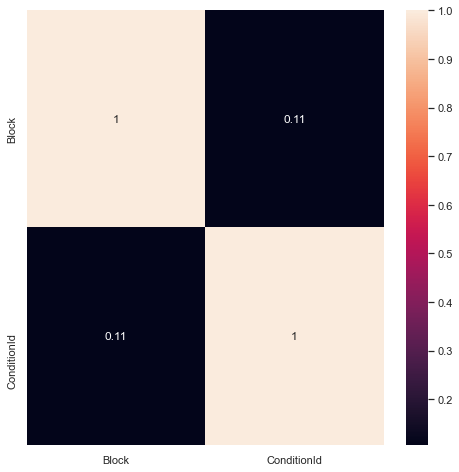

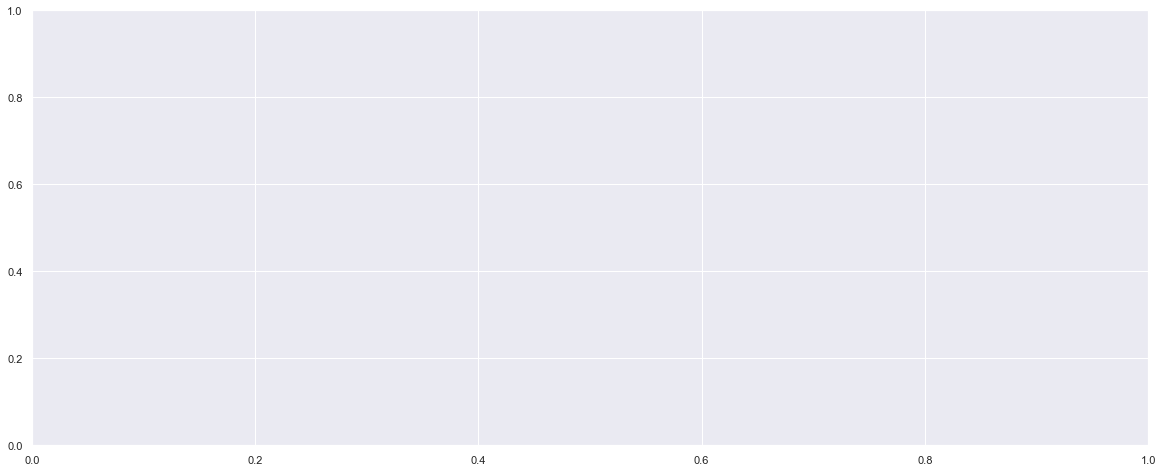

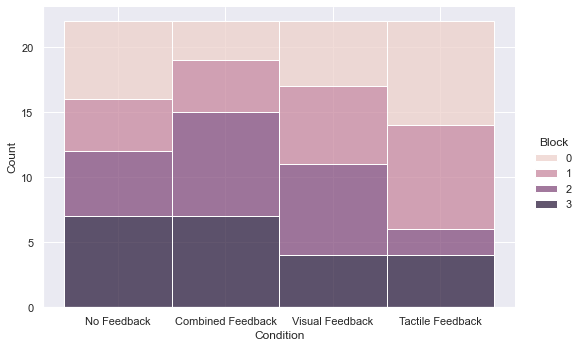

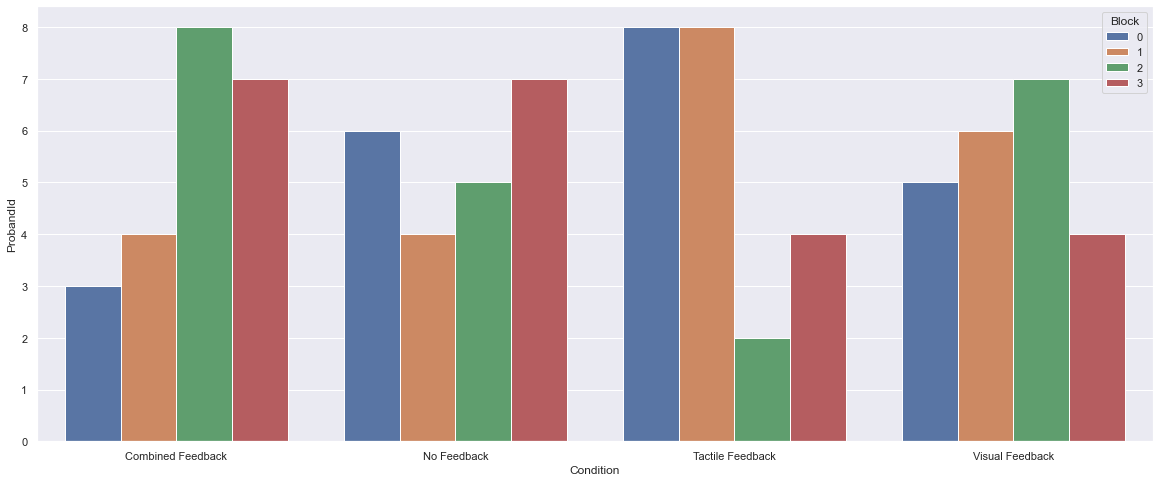

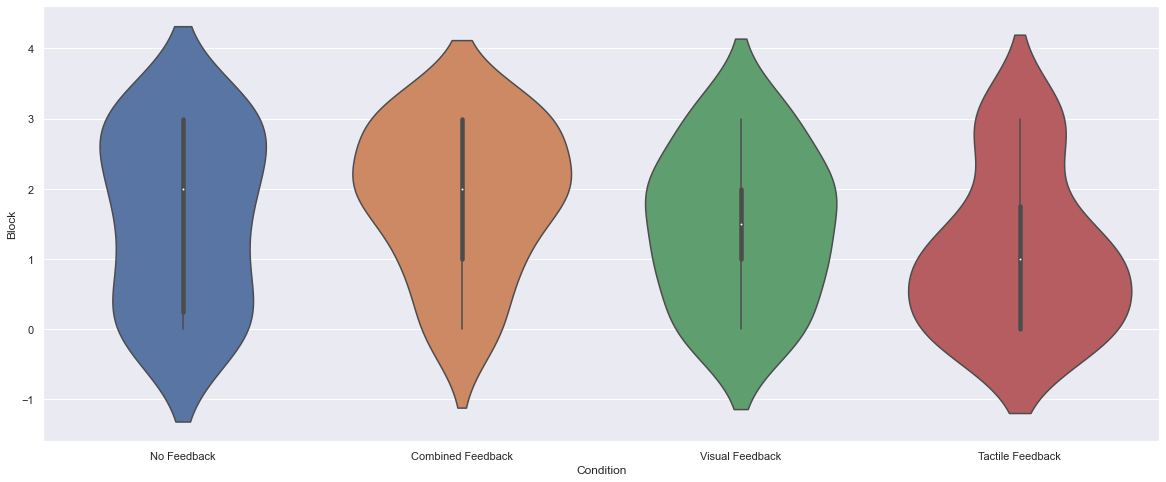

In [52]:
conditions = data_complete[['ProbandId','Block', 'Condition']].drop_duplicates().reset_index(drop=True)
conditions['ConditionId'] = conditions['Condition'].map(condition_names.index)
display(conditions)

correlations_kendall = conditions.iloc[:,1:].corr(method='kendall', min_periods=1)
display(correlations_kendall)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1 = sns.heatmap(correlations_kendall, annot=True)

fig2, ax2 = plt.subplots(figsize=(20,8))
ax2 = sns.displot(conditions, x="Condition", hue="Block", multiple="stack", aspect=1.5)

desc = conditions.groupby(['Condition', 'Block']).count()
display(desc)

fig3, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(data=desc.reset_index(), x='Condition', y='ProbandId', hue='Block')


fig2, ax2 = plt.subplots(figsize=(20,8))
sns.violinplot(data=conditions, x='Condition', y='Block')

ProbandId  BlockId          Condition  ConditionId
0           2        0        No Feedback            0
1           2        1  Combined Feedback            3
2           2        2    Visual Feedback            2
3           2        3   Tactile Feedback            1
4           4        0  Combined Feedback            3
..        ...      ...                ...          ...
79         22        3    Visual Feedback            2
80         23        0    Visual Feedback            2
81         23        1  Combined Feedback            3
82         23        2   Tactile Feedback            1
83         23        3        No Feedback            0

[84 rows x 4 columns]

BlockId  ConditionId
BlockId      1.000000     0.093348
ConditionId  0.093348     1.000000

ProbandId  ConditionId
Condition         BlockId                        
Combined Feedback 0                3            3
                  1                4            4
                  2                8            8
                  3                6            6
No Feedback       0                6            6
                  1                4            4
                  2                4            4
                  3                7            7
Tactile Feedback  0                7            7
                  1                8            8
                  2                2            2
                  3                4            4
Visual Feedback   0                5            5
                  1                5            5
                  2                7            7
                  3                4            4

<AxesSubplot:xlabel='Condition', ylabel='BlockId'>

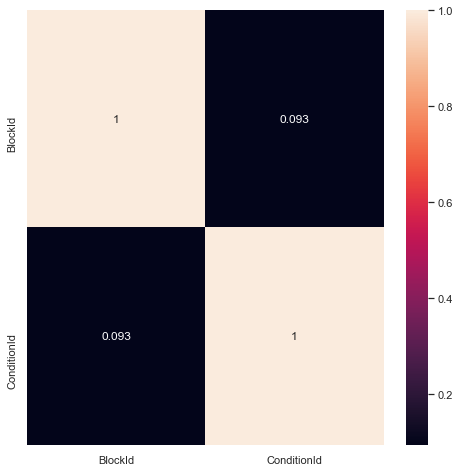

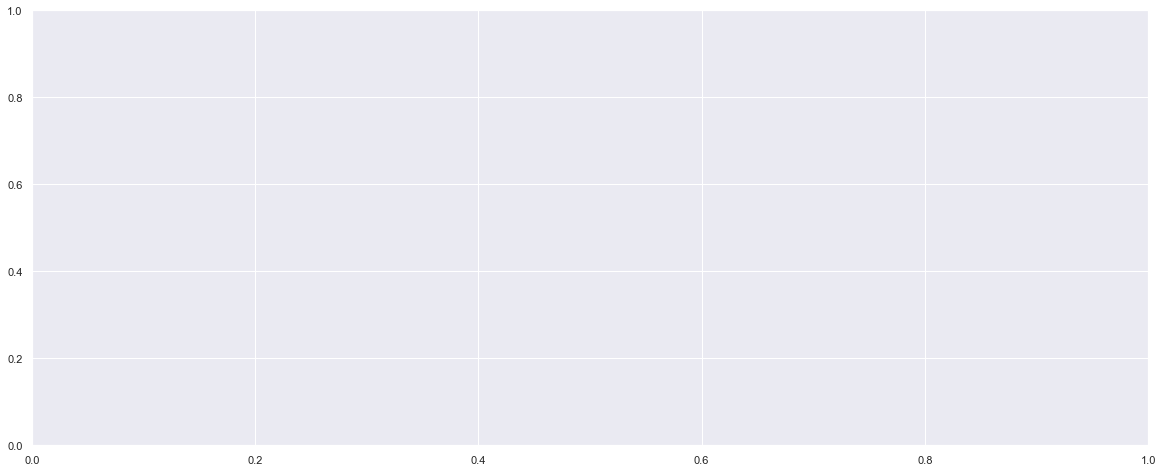

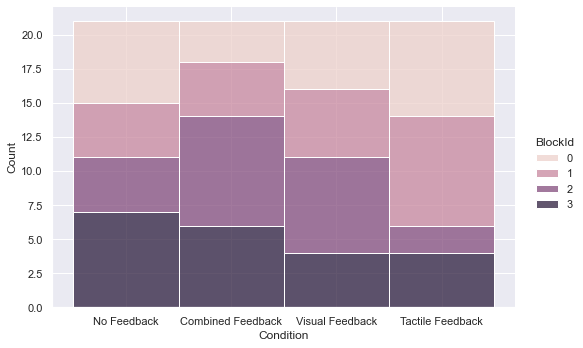

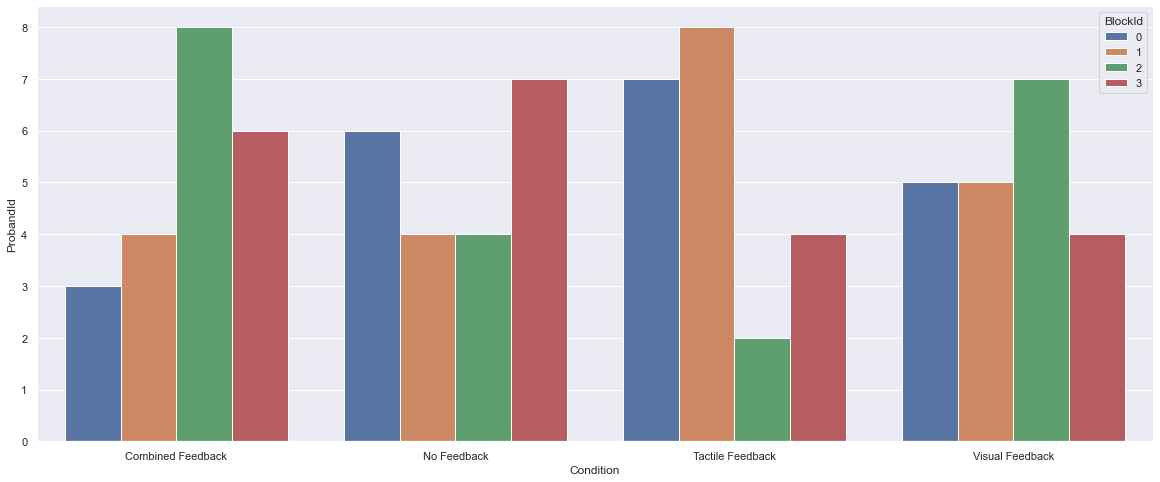

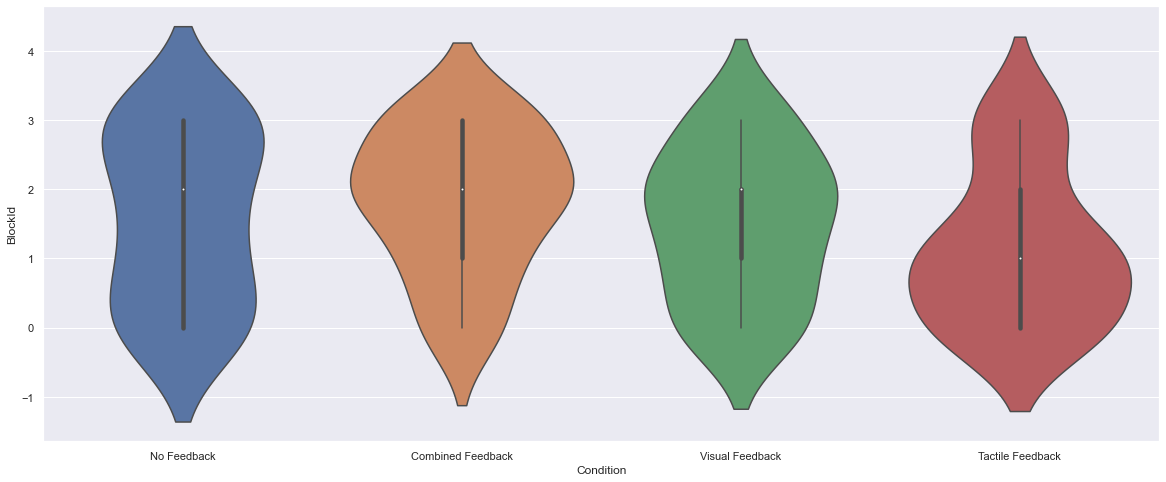

In [48]:
conditions = results_complete[['ProbandId','BlockId', 'Condition']].drop_duplicates().reset_index(drop=True)
conditions['ConditionId'] = conditions['Condition'].map(condition_names.index)
display(conditions)

correlations_kendall = conditions.iloc[:,1:].corr(method='kendall', min_periods=1)
display(correlations_kendall)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1 = sns.heatmap(correlations_kendall, annot=True)

fig2, ax2 = plt.subplots(figsize=(20,8))
ax2 = sns.displot(conditions, x="Condition", hue="BlockId", multiple="stack", aspect=1.5)

desc = conditions.groupby(['Condition', 'BlockId']).count()
display(desc)

fig3, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(data=desc.reset_index(), x='Condition', y='ProbandId', hue='BlockId')


fig2, ax2 = plt.subplots(figsize=(20,8))
sns.violinplot(data=conditions, x='Condition', y='BlockId')